# Examples of reading common data formats

In [8]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import ncempy.io as nio

# SER data

<IPython.core.display.Javascript object>


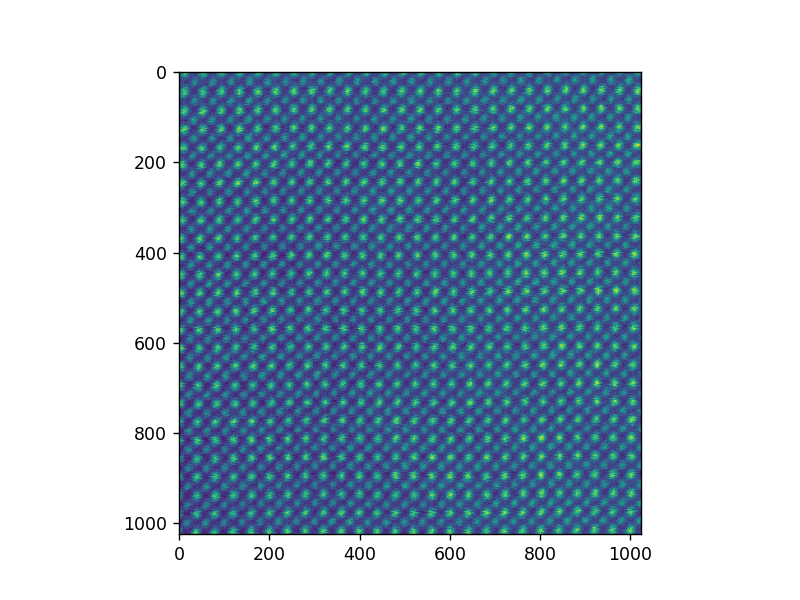

data
pixelSize
pixelUnit
pixelOrigin
filename
metadata
------
The X pixel size is 1.0012704240403383e-11


In [9]:
# load a SER file

# Use a string the specify the file path
filename = r'G:\My Drive\openNCEM test data\EMI SER\2D single image\16_STOimage_1.ser'

# Read the data using a simple command
ser1 = nio.ser.serReader(filename) # Returns a dictionary of data and meta data

fg, ax = plt.subplots(1,1)
ax.imshow(ser1['data'])

# Available meta data
for key in ser1.keys():
    print(key)
    
# Extract meta data 
print('------')
print('The X pixel size is {}'.format(ser1['pixelSize'][0]))

# MRC data
 - can read .mrc, .rec, .ali and .st

<IPython.core.display.Javascript object>


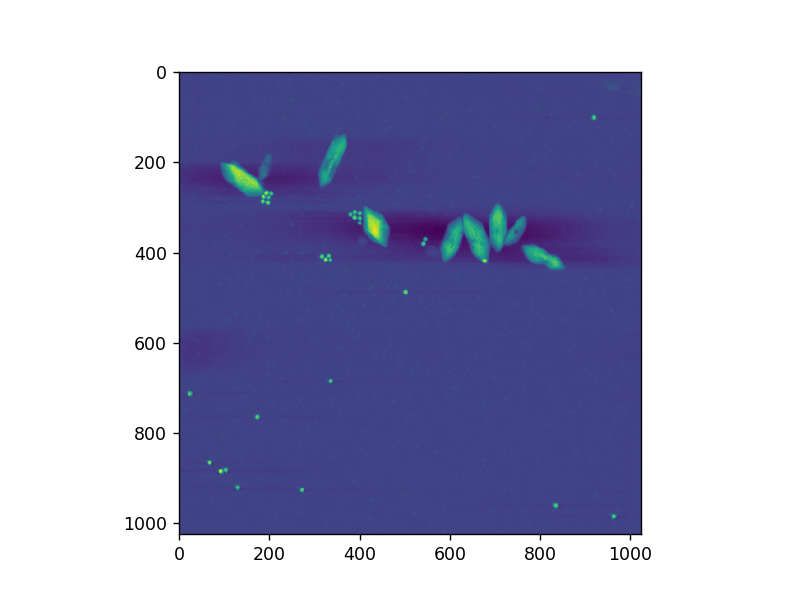

pixelSize
voxelSize
cellAngles
axisOrientations
filename
data


In [10]:
filename = r'G:\My Drive\openNCEM test data\MRC\Te_small_np_Au10_c5_L100_full.rec'

mrc1 = nio.mrc.mrcReader(filename)

fg, ax = plt.subplots(1,1)
ax.imshow(mrc1['data'].sum(axis=1))

# Available meta data
for key in mrc1.keys():
    print(key)

# Read Berkeley formatted EMD files

<IPython.core.display.Javascript object>


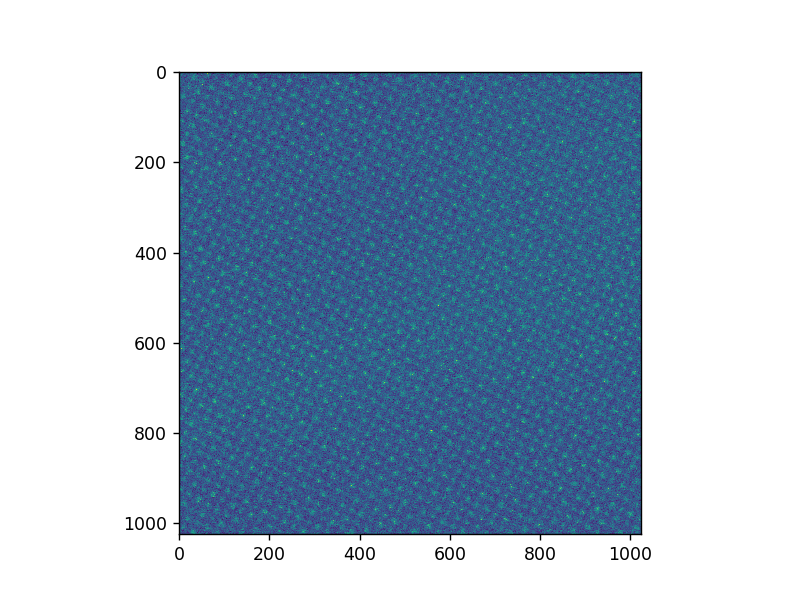

data
filename
pixelSize
pixelUnit
pixelName


In [11]:
# Load a Berkeley EMD file

filename = r'G:\My Drive\openNCEM test data\EMD\Berkeley\Acquisition_18.emd'

#with nio.emd.fileEMD(filename) as emd1:
#    data, metadata = emd1.get_emdgroup(emd1.list_emds[0])

emd0 = nio.emd.emdReader(filename)

fg,ax = plt.subplots(1,1)
axIm = ax.imshow(emd0['data'])

#Print out the pixelSize, which are the dim vectors, names and units
# Available meta data
for key in emd0.keys():
    print(key)

# Read Velox EMD file

<IPython.core.display.Javascript object>


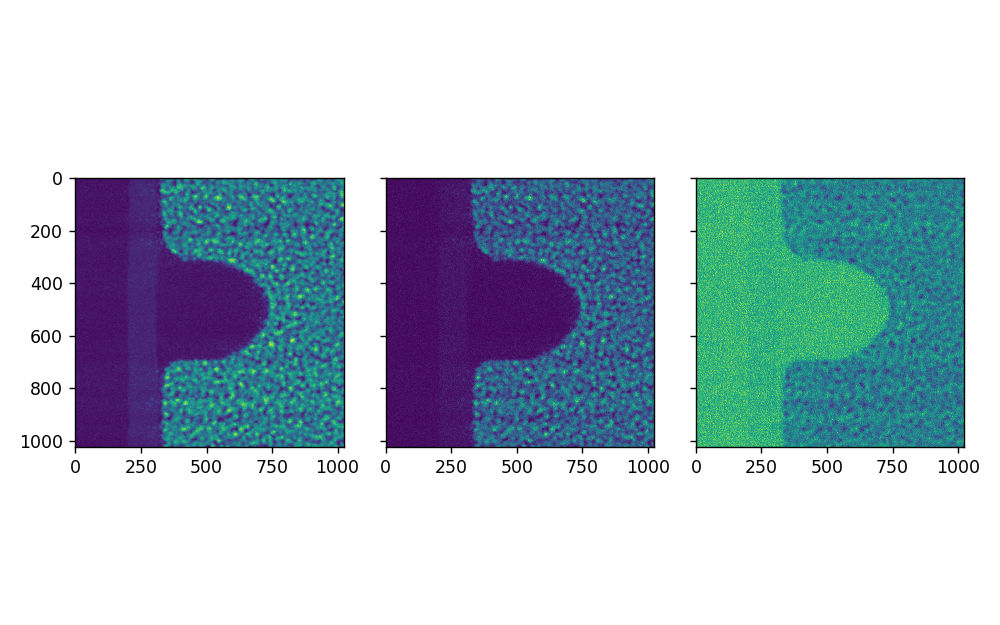

data = [[19770 19535 19518 ... 23933 23941 24368]
 [19799 19763 19724 ... 23710 24063 23638]
 [20162 19970 19857 ... 24059 23676 23394]
 ...
 [19900 19682 19544 ... 24219 24779 24526]
 [19741 19724 19634 ... 23703 23599 24069]
 [19507 19554 19379 ... 22443 23021 22932]]
filename = G:\My Drive\openNCEM test data\EMD\velox\1435 1.2 Mx STEM HAADF-DF4-DF2-BF.emd
pixelSize = (0.08491677086804356, 0.08491677086804356)
pixelSizeUnit = ('nm', 'nm')
detectorName = DF4
dwellTime = 2.0000000000000002e-005
Stage = {'Position': {'x': '0.00028377424499999982', 'y': '4.9019376000000062e-005', 'z': '-0.00017327400000000004'}, 'AlphaTilt': '-0.07557447699999989', 'BetaTilt': '-0.011455650902539491', 'HolderType': 'FEI Double Tilt UT'}
AcquisitionTime = 2018-04-24 14:35:28


In [12]:
# Read a FEI EMD VELOX file
# This EMD file has 3 STEM data sets in it (HAADF, ADF, BF)

filename = r'G:\My Drive\openNCEM test data\EMD\velox\1435 1.2 Mx STEM HAADF-DF4-DF2-BF.emd'

# Read in each data set
emdv0 = nio.emdVelox.emdVeloxReader(filename, dsetNum=0)
emdv1 = nio.emdVelox.emdVeloxReader(filename, dsetNum=1)
emdv2 = nio.emdVelox.emdVeloxReader(filename, dsetNum=2)

# Plot all three images. If you zoom in they all zoom equally.
fg,ax = plt.subplots(1,3,sharex=True,sharey=True,figsize = (8,5))
ax[0].imshow(emdv0['data'])
ax[1].imshow(emdv1['data'])
ax[2].imshow(emdv2['data'])
fg.tight_layout()

# Print out the keys in the python dictionary
for key, value in emdv0.items():
    print('{} = {}'.format(key, value))

# Plot an image with a scale bar

<IPython.core.display.Javascript object>


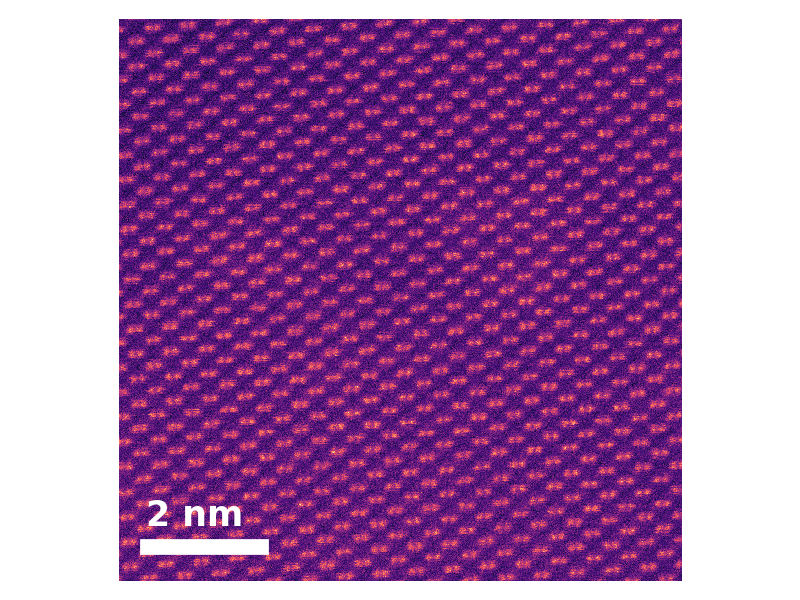

In [17]:
from matplotlib.patches import Rectangle

ser0 = nio.ser.serReader(r'C:\Users\linol\data\xicam temp\01_Si110_5images_1.ser')

image0 = ser0['data'][0,:,:]

# Plot the image data
fg, ax = plt.subplots(1,1)
ax.imshow(image0, origin='lower', cmap='magma')
ax.axis('off')

# Add a scale bar
scaleL = 2/(ser0['pixelSize'][0]*1e9) # scale bar length (nm)
scaleH = 25 # height of the scale bar rectangle
scale_R = Rectangle((40,50),scaleL,scaleH,color='w')
ax.add_patch(scale_R)
ax.text(50, 100,'2 nm',fontdict={'size':20,'weight':'bold','color':'w'})

fg.tight_layout()